# Midterm project: Equity Portfolio Management

Submitted By Group 2
- Nikhil Deekonda
- Manohar Reddy
- Chaduvu Vinith Reddy

## Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.


- From the universe list, use the stocks names and retrieve and read the datasets and using pandas DataFrame function load the datasets to data frames.
- Add prefix (stock name) to Close and Adj close of each stock's dataframe and and concatenate them to form universe_df, which consists of Close and Adj close of each stock.
- Now round off values of close column to two digits since 1 cent is the least amount that can be given as money.

In [1]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# List that stores Stocks names
universe = ["IBM", "MSFT", "GOOG", "AAPL", "AMZN", 
            "META", "NFLX", "TSLA", "ORCL", "SAP"]

# Empty dictionary to store Dataframes of the stocks
dataframes = {}

# Looping through the stocks list
for stock in universe:
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1=1514764800&period2=1546300800&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    dataframes[stock] = df
    
# Empty List for storing close and adj close columns
required_dataframes = []

# Looping through dataframes with the stock and its dataframe to append required columns
for stock, df in dataframes.items():
    df_stock = df.iloc[:, [4, 5]].copy()
    df_stock.columns = [f"{stock}_Close", f"{stock}_Adj Close"]
    required_dataframes.append(df_stock)
    
# Concatenate all dataframes horizontally
universe_df = pd.concat(required_dataframes, axis=1)

# Round off close values to cents 
cols = [f'{stock}_Close' for stock in universe]
universe_df[cols] = universe_df[cols].round(2) 
universe_df.head(20)

,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,AMZN_Adj Close,META_Close,META_Adj Close,NFLX_Close,NFLX_Adj Close,TSLA_Close,TSLA_Adj Close,ORCL_Close,ORCL_Adj Close,SAP_Close,SAP_Adj Close
0,147.47,111.800140,85.95,80.391846,53.25,53.250000,43.06,40.776524,59.45,59.450500,181.42,181.419998,201.07,201.070007,21.37,21.368668,46.63,42.282440,112.39,101.210297
1,151.52,114.873291,86.35,80.765991,54.12,54.124001,43.06,40.769413,60.21,60.209999,184.67,184.669998,205.05,205.050003,21.15,21.150000,47.71,43.261745,113.31,102.038773
2,154.59,117.199883,87.11,81.476830,54.32,54.320000,43.26,40.958790,60.48,60.479500,184.33,184.330002,205.63,205.630005,20.97,20.974667,48.18,43.687927,115.05,103.605690
3,155.34,117.772484,88.19,82.486992,55.11,55.111500,43.75,41.425125,61.46,61.457001,186.85,186.850006,209.99,209.990005,21.11,21.105333,48.47,43.950893,116.33,104.758362
4,156.28,118.482758,88.28,82.571175,55.35,55.347000,43.59,41.271263,62.34,62.343498,188.28,188.279999,212.05,212.050003,22.43,22.427334,48.98,44.413338,114.80,103.380569
5,156.63,118.743729,88.22,82.515045,55.31,55.313000,43.58,41.266525,62.63,62.634998,187.87,187.869995,209.31,209.309998,22.25,22.246000,49.06,44.659119,114.16,102.804230
6,156.96,118.997383,87.82,82.140907,55.13,55.130501,43.57,41.257053,62.72,62.716499,187.84,187.839996,212.52,212.520004,22.32,22.320000,48.80,44.422447,112.87,101.642532
7,156.98,119.011894,88.08,82.384109,55.28,55.276001,43.82,41.491409,63.83,63.834000,187.77,187.770004,217.24,217.240005,22.53,22.530001,48.95,44.558990,109.64,98.733841
8,155.97,118.243622,89.60,83.805794,56.11,56.112999,44.27,41.919857,65.26,65.260002,179.37,179.369995,221.23,221.229996,22.41,22.414667,49.51,45.068760,110.13,99.175095
9,156.64,118.758209,88.35,82.636642,56.09,56.088001,44.05,41.706821,65.24,65.242996,178.39,178.389999,221.53,221.529999,22.67,22.670668,49.59,45.141575,110.68,99.670387


### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

#### 1. On Jan 02 2018, you split the $\$5m$ into 5 $\$1m$, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was $\$147.47$. With $\$1m$, you can buy max 6781 shares with cost $\$999848.5$ with $\$151.5$‬ cash left. You decided to spend $\$1m$ on each of `['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']` respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is $\$5m$ if combining all stocks value and cash. Your holdings of stocks and cash account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}

- Initially, we have 5 million dollars, now buy the stocks of `['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']` with 1 million dollar each and store the rest amount as left amount. 
- The mark to market value on 2nd Jan is 5 Million USD which is same as the portfolio on that day. These can be observed from the computations below.

In [3]:
# Initial Funds
initial_funds = 5*(10**6)

# Alloted Funds per stock
cash_per_stock = initial_funds/5

# Invested Stocks
invested_stocks = universe[:5].copy()

# Close prices of invested stocks
close_prices_inv_stocks = {stock : universe_df.loc[0,f'{stock}_Close'] 
                           for stock in invested_stocks}

# Shares for each stock
number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_inv_stocks[stock]) / 
                    close_prices_inv_stocks[stock] for stock in invested_stocks}
print("Shares for each stock:",number_of_shares)
                    
# Stock Holdings
stock_holdings = sum(np.array([number_of_shares[stock] * close_prices_inv_stocks[stock] 
                                             for stock in invested_stocks]))
print("Stock Holdings:",stock_holdings)

# Amount left after buying shares
left_amount = initial_funds - stock_holdings
print("Cash left:",left_amount)

# Market to Market value
MTM =  left_amount + stock_holdings
print("MTM:",MTM)
portfolio = {'Cash': left_amount,'Stock Holdings': stock_holdings}
print("Portfolio:",portfolio)

Shares for each stock: {'IBM': 6781.0, 'MSFT': 11634.0, 'GOOG': 18779.0, 'AAPL': 23223.0, 'AMZN': 16820.0}
Stock Holdings: 4999849.5
Cash left: 150.5
MTM: 5000000.0
Portfolio: {'Cash': 150.5, 'Stock Holdings': 4999849.5}


#### 2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing". Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.

- As per the strategy first sell the stocks then add the obtained cash to previously left amount which makes up cash account. Now using the cash we can buy shares of stocks that has fallen.
- Write a function that returns the price drop of stocks.
- Now sort the stocks and invest amount in most 5 dropped stocks.

In [4]:
# Invested Stocks close price on 2018-01-09
selling_prices = {stock : universe_df.loc[5, f"{stock}_Close"] for stock in invested_stocks}

# Sell the current stocks
amount_obtained_per_stock = np.array([number_of_shares[stock] * selling_prices[stock] 
                                      for stock in invested_stocks])

# Total Cash obtained from selling the invested stocks
total_amount_obtained = round(sum(amount_obtained_per_stock),2)
print("Total Amount Obtained:", total_amount_obtained)

# Total cash in Cash Account 
cash_account = left_amount + total_amount_obtained
print("Total cash:", cash_account)

# Amount distributed over 5 stocks
cash_per_stock = cash_account / 5

def percentage_drop(stock):
    '''
    Function that takes in each stock and returns price drop of that stock
    '''
    start_price = universe_df.loc[0, f"{stock}_Adj Close"]
    end_price = universe_df.loc[5, f"{stock}_Adj Close"]
    return (start_price - end_price) / start_price

# Dictionary that contains percentage drop of each stock
percentage_drops = {f'{stock}': percentage_drop(stock) for stock in universe}

# Sort the stocks in Dictionary 
sorted_percentage_drops = {k: v for k, v in sorted(percentage_drops.items(), key = lambda x:x[1], reverse=True)}

# Dropped stocks needed to be invested
top_five_drops = [key for key, value in sorted_percentage_drops.items()][:5]
print("Dropped stocks:", top_five_drops)

# Close prices of top 5 drops
close_prices_drop_stocks = {stock : universe_df.loc[5,f'{stock}_Close'] 
                           for stock in top_five_drops}
print("Close prices of top 5 drops:",close_prices_drop_stocks)

# Shares for each stock
number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_drop_stocks[stock]) / 
                    close_prices_drop_stocks[stock] for stock in top_five_drops}
print("Shares for each stock:",number_of_shares)
                    
# Stock Holdings
stock_holdings = sum(np.array([number_of_shares[stock] * close_prices_drop_stocks[stock] 
                                             for stock in top_five_drops]))
print("Stock Holdings:",stock_holdings)

# Amount left after buying shares
left_amount = round(cash_account - stock_holdings,2)
print("Cash left:",left_amount)

# Market to Market value on Jan 09
MTM = round(left_amount + stock_holdings,2)
print("MTM on 09 Jan:",MTM)

# Portfolio on 09 Jan
portfolio = {'Cash': left_amount,'Stock Holdings': stock_holdings}
print("Portfolio on 09 Jan:",portfolio)

Total Amount Obtained: 5192620.94
Total cash: 5192771.44
Dropped stocks: ['AAPL', 'SAP', 'MSFT', 'META', 'GOOG']
Close prices of top 5 drops: {'AAPL': 43.58, 'SAP': 114.16, 'MSFT': 88.22, 'META': 187.87, 'GOOG': 55.31}
Shares for each stock: {'AAPL': 23830.0, 'SAP': 9097.0, 'MSFT': 11772.0, 'META': 5528.0, 'GOOG': 18776.0}
Stock Holdings: 5192596.68
Cash left: 174.76
MTM on 09 Jan: 5192771.44
Portfolio on 09 Jan: {'Cash': 174.76, 'Stock Holdings': 5192596.68}


#### 3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 

- Dividend can be obtained by subtracting Close Ratio and Adjoint close ratios and multiplying them with close price of the stock.

Note: Only dividends with value > 0.01 were considerable, as there is no money less than 1 cent. This operation is done in part 5.

In [5]:
required_dataframes = []

# Looping through dataframes with the stock and its dataframe to append required columns
for stock, df in dataframes.items():
    df_stock = df.iloc[:, [4, 5]].copy()
    df_stock = df_stock.shift(1)/df_stock
    df_stock.columns = [f"{stock}_Close_Ratio", f"{stock}_Adj_Close_Ratio"]
    df_stock['Dividend'] = round((df_stock[f"{stock}_Close_Ratio"] - df_stock[f"{stock}_Adj_Close_Ratio"])*df["Close"],2)
    required_dataframes.append(df_stock)
new_dataframes = {stock : df for stock, df in zip(universe,required_dataframes)} 

# Dividend day's dividend amount
for stock in universe:
    print(new_dataframes[stock][abs(new_dataframes[stock]['Dividend'])>0.01])


     IBM_Close_Ratio  IBM_Adj_Close_Ratio  Dividend
26          1.042415             1.032251      1.43
88          1.002735             0.991726      1.50
152         1.014644             1.003799      1.50
216         1.011833             0.999108      1.50
     MSFT_Close_Ratio  MSFT_Adj_Close_Ratio  Dividend
30           0.989208              0.984583      0.42
93           1.001750              0.997427      0.42
156          1.017648              1.013747      0.42
220          1.018767              1.014385      0.46
Empty DataFrame
Columns: [GOOG_Close_Ratio, GOOG_Adj_Close_Ratio, Dividend]
Index: []
     AAPL_Close_Ratio  AAPL_Adj_Close_Ratio  Dividend
27           0.991944              0.987916      0.16
90           1.007689              1.003818      0.18
153          1.006505              1.002987      0.18
216          1.007003              1.003501      0.18
Empty DataFrame
Columns: [AMZN_Close_Ratio, AMZN_Adj_Close_Ratio, Dividend]
Index: []
Empty DataFrame
Columns: [ME

####  4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.

- Similar operations of part 2 were performed to find the MTM and portfolio values.

In [6]:
# Invested Stocks close price on 2018-01-09
selling_prices = {stock : universe_df.loc[10, f"{stock}_Close"] for stock in top_five_drops}

# Sell the current stocks
amount_obtained_per_stock = np.array([number_of_shares[stock] * selling_prices[stock] 
                                      for stock in top_five_drops])

# Total Cash obtained from selling the invested stocks
total_amount_obtained = round(sum(amount_obtained_per_stock),2)
print("Total Amount Obtained:", total_amount_obtained)

# Total cash in Cash Account 
cash_account = round(left_amount + total_amount_obtained,2)
print("Total cash:", cash_account)

# Amount distributed over 5 stocks
cash_per_stock = cash_account / 5

def percentage_drop(stock):
    '''
    Function that takes in each stock and returns price drop of that stock
    '''
    start_price = universe_df.loc[5, f"{stock}_Adj Close"]
    end_price = universe_df.loc[10, f"{stock}_Adj Close"]
    return (start_price - end_price) / start_price

# Dictionary that contains percentage drop of each stock
percentage_drops = {f'{stock}': percentage_drop(stock) for stock in universe}

# Sort the stocks in Dictionary 
sorted_percentage_drops = {k: v for k, v in sorted(percentage_drops.items(), key = lambda x:x[1], reverse=True)}

# Dropped stocks needed to be invested
new_top_five_drops = [key for key, value in sorted_percentage_drops.items()][:5]
print("Dropped stocks:", top_five_drops)

# Close prices of top 5 drops
close_prices_drop_stocks = {stock : universe_df.loc[5,f'{stock}_Close'] 
                           for stock in new_top_five_drops}
print("Close prices of top 5 drops:",close_prices_drop_stocks)

# Shares for each stock
number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_drop_stocks[stock]) / 
                    close_prices_drop_stocks[stock] for stock in new_top_five_drops}
print("Shares for each stock:",number_of_shares)
                    
# Stock Holdings
stock_holdings = sum(np.array([number_of_shares[stock] * close_prices_drop_stocks[stock] 
                                             for stock in new_top_five_drops]))
print("Stock Holdings:",stock_holdings)

# Amount left after buying shares
left_amount = round(cash_account - stock_holdings,2)
print("Cash left:",left_amount)

# Market to Market value on Jan 09
MTM = round(left_amount + stock_holdings,2)
print("MTM on 17 Jan:",MTM)

# Portfolio on 09 Jan
portfolio = {'Cash': left_amount,'Stock Holdings': stock_holdings}
print("Portfolio on 17 Jan:",portfolio)

Total Amount Obtained: 5184225.31
Total cash: 5184400.07
Dropped stocks: ['AAPL', 'SAP', 'MSFT', 'META', 'GOOG']
Close prices of top 5 drops: {'META': 187.87, 'SAP': 114.16, 'MSFT': 88.22, 'GOOG': 55.31, 'ORCL': 49.06}
Shares for each stock: {'META': 5519.0, 'SAP': 9082.0, 'MSFT': 11753.0, 'GOOG': 18746.0, 'ORCL': 21134.0}
Stock Holdings: 5184180.61
Cash left: 219.46
MTM on 17 Jan: 5184400.07
Portfolio on 17 Jan: {'Cash': 219.46, 'Stock Holdings': 5184180.61}


#### 5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.

- From part 2 an 4 we find many similarities, hence we can define a function such that it can return the MTM of each day until 31 Dec and the portfolio on Dec 31.
- The function also considers the dividend value which is automatically added if the shares were sold on that day.
- The portfolio value can be checked at regular intervals of 5 days by printing portfolio which is commented and the value of MTM at that day would be same.
- Now this function uses a percentage_drop function which is sorted based on the values obtained.
- When the input sent is True, the function sorts the most price drops which gives us the most dropped stocks i.e. this function follows rebalancing with low strategy

In [7]:
def rebalance_strategy(low_strategy):
    start_date = 0
    end_date = len(universe_df) - 1
    # Initial Funds
    initial_funds = 5*(10**6)

    # Alloted Funds per stock
    cash_per_stock = initial_funds / 5
    #print(cash_per_stock)

    # Invested Stocks
    invested_stocks = universe[:5].copy()

    close_prices_inv_stocks = {stock : universe_df.loc[0, f'{stock}_Close'] 
                               for stock in invested_stocks}
    #print(close_prices_inv_stocks)

    # Shares for each stock
    number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_inv_stocks[stock]) / 
                        close_prices_inv_stocks[stock] for stock in invested_stocks}
    #print(number_of_shares)
    stock_holdings = sum(np.array([number_of_shares[stock] * close_prices_inv_stocks[stock] 
                                                     for stock in invested_stocks]))

    # Amount left after buying shares
    left_amount = initial_funds - stock_holdings

    MTM = [5000000.0]
    while start_date < end_date:
        for stock in invested_stocks:
            # check for dividends
            if(new_dataframes[stock].loc[start_date + 5,'Dividend']>0.01):
                dividend = new_dataframes[stock].loc[start_date + 5,'Dividend']
                left_amount = left_amount + number_of_shares[stock]*dividend
                
         # Invested Stocks close price on 2018-01-09
        for i in range(1,6):
            selling_prices = {stock : universe_df.loc[start_date + i, f"{stock}_Close"] 
                              for stock in invested_stocks}
             # Sell the current stocks
            amount_obtained_per_stock = np.array([number_of_shares[stock] * selling_prices[stock] 
                                                  for stock in invested_stocks])
            MTM.append(round(left_amount+sum(amount_obtained_per_stock),2))

        total_amount_obtained = round(sum(amount_obtained_per_stock), 2)
        

        # Total cash now 
        cash_account = round((left_amount + total_amount_obtained),2) 
       
        # Amount distributed over 5 stocks
        cash_per_stock = cash_account / 5

        def percentage_drop(stock):
            start_price = universe_df.loc[start_date, f"{stock}_Adj Close"]
            end_price = universe_df.loc[start_date+5, f"{stock}_Adj Close"]
            return (start_price - end_price) / start_price

        # Dictionary that contains percentage drop of each stock
        percentage_drops = {f'{stock}': percentage_drop(stock) for stock in universe}
     

        # Sort the stocks in Dictionary 
        sorted_percentage_drops = {k: v for k, v in sorted(percentage_drops.items(), key = lambda x:x[1], reverse=low_strategy)}
   

        # Stocks needed to be invested
        top_five_drops = [key for key, value in sorted_percentage_drops.items()][:5]


        # Close prices of top 5 drops
        close_prices_drop_stocks = {stock : universe_df.loc[start_date+5,f'{stock}_Close'] 
                                   for stock in top_five_drops}

        # Shares for each stock
        number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_drop_stocks[stock]) / 
                            close_prices_drop_stocks[stock] for stock in top_five_drops}

        # Stock Holdings
        stock_holdings = round(sum(np.array([number_of_shares[stock] * close_prices_drop_stocks[stock] 
                                                     for stock in top_five_drops])),2)

        # Amount left after buying shares
        left_amount = round(cash_account - stock_holdings,2)
        portfolio = {'Cash': left_amount,'Stock Holdings': stock_holdings}
        #print("Portfolio after 5 days: ", portfolio)
        invested_stocks = top_five_drops
        start_date = start_date+5
    return portfolio, MTM

In [8]:
portfolio_1, MTM_1 = rebalance_strategy(low_strategy = True)
print("Portfolio:",portfolio_1, " and MTM:",MTM_1[-1])

Portfolio: {'Cash': 167.53, 'Stock Holdings': 5334502.58}  and MTM: 5334670.11


#### 6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.

- The same strategy function with value false returns the high price drop buying strategy

In [9]:
portfolio_2, MTM_2 = rebalance_strategy(low_strategy = False)
print("Portfolio:",portfolio_2, " and MTM:",MTM_2[-1])

Portfolio: {'Cash': 183.45, 'Stock Holdings': 4820872.23}  and MTM: 4821055.68


#### 7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.

- Apply mean to the close columns of each row which gives us "high tech index" list.
- Find the change in percentage of "high tech index" w.r.t its value on Jan 02
- Simlalrly, percent_change_MTM_1 and percent_change_MTM_2 has the change in percentage of Low strategy MTM series and High Strategy MTM series w.r.t to their values on 02 Jan respectively.
- Now, combine these lists to form a dataframe and plot the graphs to compare them.

Text(0.5, 1.0, 'Hitech Index vs MTMs of Low and High Strategy')

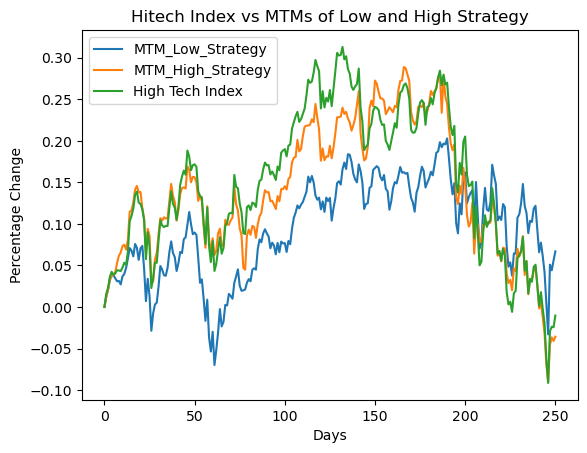

In [10]:
high_tech_index = universe_df[cols].mean(axis=1) # cols were defined in part 3
percent_change_high_tech_index = [(high_tech_index[i] - high_tech_index[0])/high_tech_index[0] for i in range(len(high_tech_index))]
percent_change_MTM_1 = [(MTM_1[i] - MTM_1[0])/MTM_1[0] for i in range(len(MTM_1))]
percent_change_MTM_2 = [(MTM_2[i] - MTM_2[0])/MTM_2[0] for i in range(len(MTM_2))]
df = pd.DataFrame({"MTM_Low_Strategy":percent_change_MTM_1, "MTM_High_Strategy":percent_change_MTM_2, "High Tech Index": percent_change_high_tech_index})
df.plot()
plt.xlabel("Days")
plt.ylabel("Percentage Change")
plt.title("Hitech Index vs MTMs of Low and High Strategy")

#### 8. Download the USD/JPY 2018 historical data at https://finance.yahoo.com/quote/JPY%3DX/history?period1=1514764800&period2=1546300800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.

- After downloading the historical data of exchange rate from USD to JPY, load it into a dataframe.
- Merge this data frame with stock data frames on "Date", so that we have same number of days and dates matched.
- Multiply "Close" column values with MTM of low strategy series and find its pecentage change w.r.t to value on Jan 02
- Plot a graph between MTM of low strategy for USD and MTM of low strategy for JPY.
- Repeat above steps for MTM of high strategy

##### "USD vs JPY for MTM Low Strategy"

Text(0.5, 1.0, 'USD vs JPY for MTM Low Strategy')

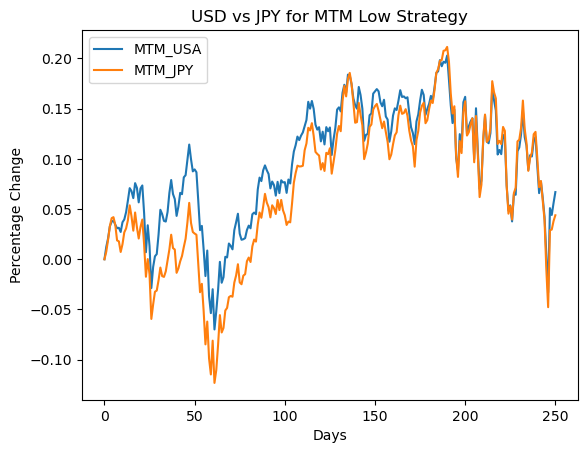

In [11]:
currency_df = pd.read_csv("/Users/nikhildeekonda/Downloads/foreignExchange.csv")
currency_df = currency_df.merge(dataframes['IBM']['Date'], on='Date', how='inner')
MTM_JPY_1 = [MTM_1[i]*currency_df.loc[i,'Close'] for i in range(len(MTM_1))]
per_cent_MTM_JPY_1 = [(MTM_JPY_1[i]-MTM_JPY_1[0])/MTM_JPY_1[0] for i in range(len(MTM_JPY_1))]
df_low = pd.DataFrame({"MTM_USA": percent_change_MTM_1, "MTM_JPY": per_cent_MTM_JPY_1})
df_low.plot()
plt.xlabel("Days")
plt.ylabel("Percentage Change")
plt.title("USD vs JPY for MTM Low Strategy")

##### "USD vs JPY for MTM High Strategy"

Text(0.5, 1.0, 'USD vs JPY for MTM High Strategy')

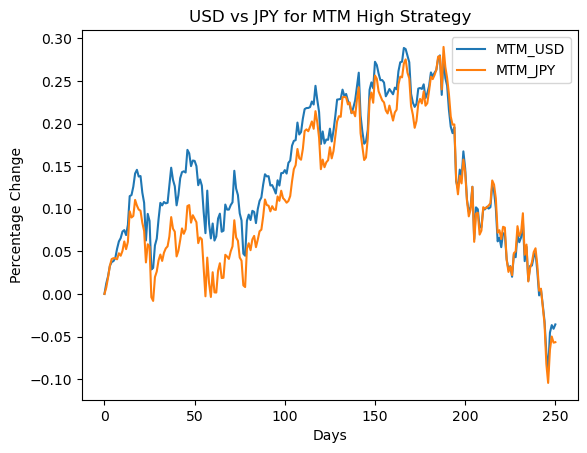

In [12]:
MTM_JPY_2 = [MTM_2[i]*currency_df.loc[i,'Close'] for i in range(len(MTM_2))]
per_cent_MTM_JPY_2 = [(MTM_JPY_2[i]-MTM_JPY_2[0])/MTM_JPY_2[0] for i in range(len(MTM_JPY_2))]
df_high = pd.DataFrame({"MTM_USD": percent_change_MTM_2, "MTM_JPY": per_cent_MTM_JPY_2})
df_high.plot()
plt.xlabel("Days")
plt.ylabel("Percentage Change")
plt.title("USD vs JPY for MTM High Strategy")

#### 9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

- Same as part 5 we define a function, but here we give days as input, which implies we can rebalance at given days.
- Here, we just need MTM, so we are not removing portfolio from the function.

In [13]:
def new_rebalance_strategy(low_strategy,days):
    start_date = 0
    end_date = len(universe_df) - 1
    # Initial Funds
    initial_funds = 5*(10**6)

    # Alloted Funds per stock
    cash_per_stock = initial_funds / 5
    #print(cash_per_stock)

    # Invested Stocks
    invested_stocks = universe[:5].copy()

    close_prices_inv_stocks = {stock : universe_df.loc[0, f'{stock}_Close'] 
                               for stock in invested_stocks}
    #print(close_prices_inv_stocks)

    # Shares for each stock
    number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_inv_stocks[stock]) / 
                        close_prices_inv_stocks[stock] for stock in invested_stocks}
    #print(number_of_shares)
    stock_holdings = sum(np.array([number_of_shares[stock] * close_prices_inv_stocks[stock] 
                                                     for stock in invested_stocks]))

    # Amount left after buying shares
    left_amount = initial_funds - stock_holdings

    MTM = [5000000.0]
    while start_date < end_date:
        if start_date + days > end_date:
            days = end_date - start_date
        for stock in invested_stocks:
            # check for dividends
            if(new_dataframes[stock].loc[start_date + days,'Dividend']>0.01):
                dividend = new_dataframes[stock].loc[start_date + days,'Dividend']
                left_amount = left_amount + number_of_shares[stock]*dividend

        # mtm changes due price change
        for i in range(1,days + 1):
            selling_prices = {stock : universe_df.loc[start_date + i, f"{stock}_Close"] 
                              for stock in invested_stocks}
             # Sell the current stocks
            amount_obtained_per_stock = np.array([number_of_shares[stock] * selling_prices[stock] 
                                                  for stock in invested_stocks])
            MTM.append(round(left_amount+sum(amount_obtained_per_stock),2))

        total_amount_obtained = round(sum(amount_obtained_per_stock), 2)


        # Total cash now 
        cash_account = round((left_amount + total_amount_obtained),2) 

        # Amount distributed over 5 stocks
        cash_per_stock = cash_account / 5

        def percentage_drop(stock):
            start_price = universe_df.loc[start_date, f"{stock}_Adj Close"]
            end_price = universe_df.loc[start_date + days, f"{stock}_Adj Close"]
            return (start_price - end_price) / start_price

        # Dictionary that contains percentage drop of each stock
        percentage_drops = {f'{stock}': percentage_drop(stock) for stock in universe}


        # Sort the stocks in Dictionary 
        sorted_percentage_drops = {k: v for k, v in sorted(percentage_drops.items(), key = lambda x:x[1], reverse=low_strategy)}


        # Stocks needed to be invested
        top_five_drops = [key for key, value in sorted_percentage_drops.items()][:5]


        # Close prices of top 5 drops
        close_prices_drop_stocks = {stock : universe_df.loc[start_date + days,f'{stock}_Close'] 
                                   for stock in top_five_drops}

        # Shares for each stock
        number_of_shares = {stock : (cash_per_stock - cash_per_stock % close_prices_drop_stocks[stock]) / 
                            close_prices_drop_stocks[stock] for stock in top_five_drops}

        # Stock Holdings
        stock_holdings = round(sum(np.array([number_of_shares[stock] * close_prices_drop_stocks[stock] 
                                                     for stock in top_five_drops])),2)

        # Amount left after buying shares
        left_amount = round(cash_account - stock_holdings,2)
        invested_stocks = top_five_drops
        start_date = start_date + days
    return MTM

- Now we define a function that returns MTM on 31 Dec using new_strategy method

In [14]:
def evaluate_strategy(day_interval, low_strategy):
    MTM = new_rebalance_strategy(low_strategy = low_strategy, days = day_interval)
    return MTM[-1]

# Initialize best day interval
best_day_interval = None

##### Low Strategy

In [15]:
# Already MTM for low strategy is available, hence initialise it as max_MTM
max_MTM = MTM_1[-1]
# Iterate through each day interval and evaluate the maximum MTM
for day_interval in range(1, 251) :
    final_MTM = evaluate_strategy(day_interval , True)
    if final_MTM > max_MTM:
        max_MTM = final_MTM
        best_day_interval = day_interval
print("The optimal interval for low strategy is",best_day_interval, "and the MTM obtained on 31 Dec is", max_MTM)

The optimal interval for low strategy is 60 and the MTM obtained on 31 Dec is 5910937.22


##### High Strategy

In [16]:
# Already MTM for high strategy is available, hence initialise it as max_MTM 
max_MTM_high = MTM_2[-1]
# Iterate through each day interval and evaluate the strategy
for day_interval in (1,251):
    final_MTM = evaluate_strategy(day_interval,False)
    if final_MTM > max_MTM_high:
        max_MTM_high = final_MTM
        best_day_interval = day_interval
print("The optimal interval for high strategy is",best_day_interval, "and the MTM obtained on 31 Dec is", max_MTM_high)

The optimal interval for high strategy is 1 and the MTM obtained on 31 Dec is 5373809.93
